![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('prueba.csv')

Separen el dataset en X, y (variable objetivo)

In [3]:
y = dataset['HOSPITALIZACION'].values  
X = dataset.drop('HOSPITALIZACION', axis=1).values 

Separen el dataset en X_train, X_test, y_train y y_test

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [5]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [6]:

from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=4) 
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [7]:
y_pred = classifier.predict(X_test) 

In [8]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

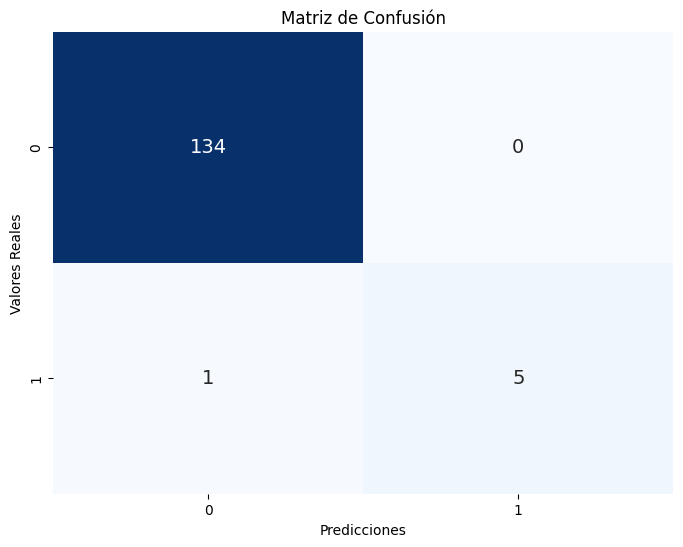

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_true=[0, 1], y_pred=[0, 1], labels=[0, 1])
recall = recall_score(y_true=[0, 1], y_pred=[0, 1], labels=[0, 1])
f1 = f1_score(y_true=[0, 1], y_pred=[0, 1], labels=[0, 1])
accuracy = accuracy_score(y_true=[0, 1], y_pred=[0, 1])


tn, fp, fn, tp = confusion_matrix(y_true=[0, 1], y_pred=[0, 1]).ravel()



print("Matriz de Confusión:")
print(conf_matrix)
print("\nMétricas de Evaluación:")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Matriz de Confusión:
[[134   0]
 [  1   5]]

Métricas de Evaluación:
Precisión: 1.00
Recall: 1.00
F1-Score: 1.00
Accuracy: 1.00


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

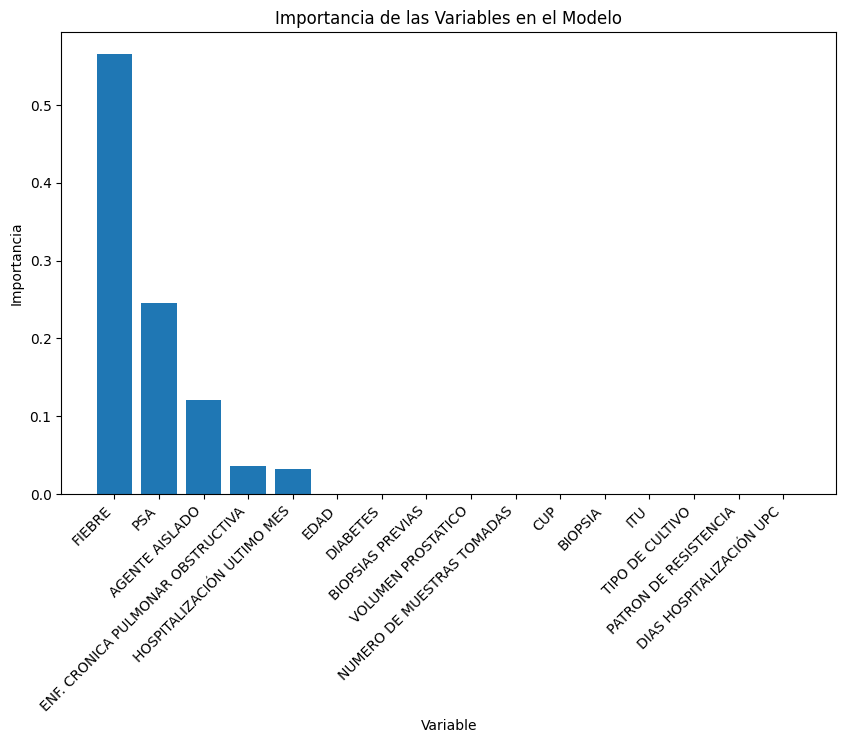

In [11]:
# Converte X a un DataFrame
X2=dataset.drop('HOSPITALIZACION', axis=1)


importances = classifier.feature_importances_

# Crea un DataFrame con nombres de características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': X2.columns, 'Importance': importances})

# Ordena el DataFrame por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables en el Modelo')
plt.xticks(rotation=45, ha='right')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [12]:
from sklearn.model_selection import  GridSearchCV

# Configura la búsqueda de hiperparámetros con validación cruzada
param_grid = {'max_depth': [1,2,3,4,5,7,10,15]} 
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Realiza la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene el mejor valor de max_depth
best_max_depth = grid_search.best_params_['max_depth']

print(best_max_depth)


optimal_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
optimal_model.fit(X_train, y_train)

y_pred_optimal = optimal_model.predict(X_test)

3


In [24]:
# Calcula métricas para ambos modelos
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

accuracy_arbitrary = accuracy_score(y_test, y_pred)
precision_arbitrary = precision_score(y_test, y_pred)
recall_arbitrary = recall_score(y_test, y_pred)
f1_arbitrary = f1_score(y_test, y_pred)


print("Métricas para modelo con max_depth óptimo:")
print(f"Accuracy: {accuracy_optimal:.2f}")
print(f"Precisión: {precision_optimal:.2f}")
print(f"Recall: {recall_optimal:.2f}")
print(f"F1-Score: {f1_optimal:.2f}")

print("\nMétricas para modelo con profundidad arbitraria:")
print(f"Accuracy: {accuracy_arbitrary:.2f}")
print(f"Precisión: {precision_arbitrary:.2f}")
print(f"Recall: {recall_arbitrary:.2f}")
print(f"F1-Score: {f1_arbitrary:.2f}")

Métricas para modelo con max_depth óptimo:
Accuracy: 0.99
Precisión: 1.00
Recall: 0.83
F1-Score: 0.91

Métricas para modelo con profundidad arbitraria:
Accuracy: 0.99
Precisión: 1.00
Recall: 0.83
F1-Score: 0.91


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k_neighbors_model = KNeighborsClassifier(n_neighbors=5)


k_neighbors_model.fit(X_train, y_train)


y_pred = k_neighbors_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy: 0.99
Precisión: 1.00
Recall: 0.67
F1-Score: 0.80


Encuentre el valor óptimo para k

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Defino los parámetros a buscar
param_grid = {'n_neighbors': range(1, 21)}


grid_search = GridSearchCV(k_neighbors_model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_k = grid_search.best_params_['n_neighbors']


optimal_k_neighbors_model = KNeighborsClassifier(n_neighbors=best_k)
optimal_k_neighbors_model.fit(X_train, y_train)


y_pred_optimal = optimal_k_neighbors_model.predict(X_test)

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [29]:
# Calcula la métrica de evaluación para el modelo con k óptimo
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)


print(f"El mejor valor de k: {best_k}")
print(f"Accuracy para el modelo con k óptimo: {accuracy_optimal:.2f}")

El mejor valor de k: 2
Accuracy para el modelo con k óptimo: 0.99


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/